In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection
from numpy.random import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
#load data
path = '/Users/dankang/Desktop/SpringBoard/Spotify/Data/Processed Data/EDA_Spotify_Data.csv'
df = pd.read_csv(path)

In [72]:
df.shape

(133638, 20)

In [3]:
df.head().T

,0,1,2,3,4
valence,0.0594,0.963,0.0394,0.165,0.253
year,1921,1921,1921,1921,1921
acousticness,0.982,0.732,0.961,0.967,0.957
artists,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",['Dennis Day'],['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,['Frank Parker'],['Phil Regan']
danceability,0.279,0.819,0.328,0.275,0.418
duration_ms,831667,180533,500062,210000,166693
energy,0.211,0.341,0.166,0.309,0.193
explicit,0,0,0,0,0
instrumentalness,0.878,0,0.913,2.77e-05,1.68e-06
key,10,7,3,5,3


In [73]:
#check to make sure we got rid of duplicate entries
df = df[~df.duplicated()==1]

In [74]:
df.shape

(133638, 20)

In [4]:
key_features = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'year', 'median popularity']

In [6]:
df1 = df[key_features]

In [7]:
df1.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,valence,year,median popularity
0,4,0.982,0.279,0.211,0.878000,0.665,0.0594,1921,4.0
1,5,0.732,0.819,0.341,0.000000,0.160,0.9630,1921,1.0
2,5,0.961,0.328,0.166,0.913000,0.101,0.0394,1921,2.0
3,3,0.967,0.275,0.309,0.000028,0.381,0.1650,1921,3.0
4,2,0.957,0.418,0.193,0.000002,0.229,0.2530,1921,1.0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='popularity'), 
                                                    df1.popularity, test_size=0.3, 
                                                    random_state=47)



In [75]:
X_train.describe()

,acousticness,danceability,energy,instrumentalness,liveness,valence,year,median popularity
count,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000
mean,0.502552,0.538714,0.483340,0.168385,0.210387,0.532856,1975.883330,30.059538
std,0.378310,0.177599,0.268325,0.314331,0.179679,0.263629,26.273825,21.027976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000
25%,0.099400,0.415000,0.255000,0.000000,0.099300,0.323000,1954.000000,9.000000
50%,0.513000,0.549000,0.473000,0.000230,0.138000,0.546000,1977.000000,33.000000
75%,0.901000,0.672000,0.705000,0.108000,0.269000,0.751000,1998.000000,46.000000
max,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,2020.000000,100.000000


In [76]:
y_train.describe()

count    93546.000000
mean        31.182295
std         22.406865
min          0.000000
25%          8.000000
50%         33.000000
75%         48.000000
max        100.000000
Name: popularity, dtype: float64

In [9]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[31.18229534]])

In [10]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [11]:
train_mean = y_train.mean()

In [12]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.00012281643343126092

In [13]:
X_defaults_median = X_train.median()
X_defaults_median

acousticness            0.51300
danceability            0.54900
energy                  0.47300
instrumentalness        0.00023
liveness                0.13800
valence                 0.54600
year                 1977.00000
median popularity      33.00000
dtype: float64

In [14]:
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [15]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [16]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [17]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [18]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8699075090359906, 0.8713733251666128)

Here we see that a linear regression explains 87% of the variance in the train set, and 87% of the variance in the test set. 

In [19]:
#Lets look at Mean absolute error
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(5.264426909182511, 5.253986373615802)

You'd expect to be within 5.3 or so of the actual popularity score. Lets try imputing with the mean now.

In [20]:
X_defaults_mean = X_train.mean()
X_defaults_mean

acousticness            0.502552
danceability            0.538714
energy                  0.483340
instrumentalness        0.168385
liveness                0.210387
valence                 0.532856
year                 1975.883330
median popularity      30.059538
dtype: float64

In [21]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [22]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [23]:
#train the model
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [24]:
#make predictions
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [25]:
#assess performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.8699075090359906, 0.8713733251666128)

In [26]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(5.264426909182511, 5.253986373615802)

In [56]:
#definee the pipeline

pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k = 8),
    LinearRegression()
)

In [57]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x7ff2bbfa3560>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [58]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [59]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8699075090359906, 0.8713733251666128)

In [51]:
median_r2

(0.8699075090359906, 0.8713733251666128)

Lets now cross validate

In [60]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [61]:
cv_scores = cv_results['test_score']
cv_scores

array([0.86849272, 0.86824397, 0.86631281, 0.87602881, 0.87030256])

In [62]:
np.mean(cv_scores), np.std(cv_scores)

(0.8698761729861729, 0.003326028621309575)

In [63]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [64]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [65]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [66]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selectkbest',
                                        SelectKBest(k=8,
                                                    score_

In [67]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [68]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

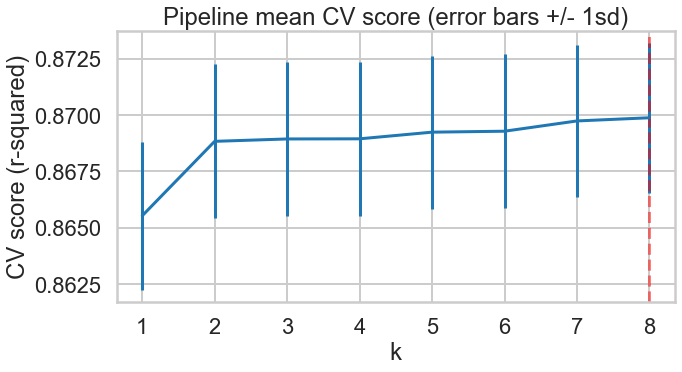

In [69]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [71]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

median popularity    17.903420
year                  3.038435
valence               0.373256
danceability         -0.111284
energy               -0.180981
acousticness         -0.279777
instrumentalness     -0.403477
liveness             -0.484042
dtype: float64

Median popularity, or artist is our most positive feature, followed by year. 